In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [3]:
print("X_tain shape:",X_train[0].shape)
print("y_tain shape:",y_train[0].shape)

X_tain shape: (28, 28)
y_tain shape: ()


In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

In [6]:
def process_img(x, y):
    x = x /255
    return (x, y)

In [7]:
dataset = dataset.map(process_img)

In [8]:
dataset = dataset.batch(90)

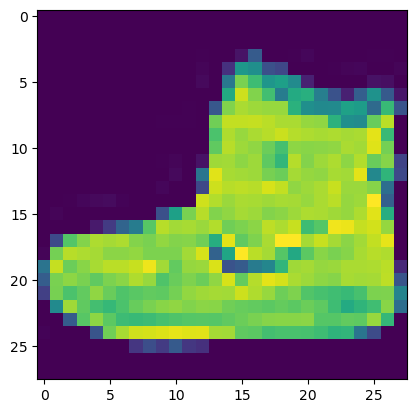

In [9]:
for i in dataset.take(1):
    img = i[0][0]
    plt.imshow(img)
    break

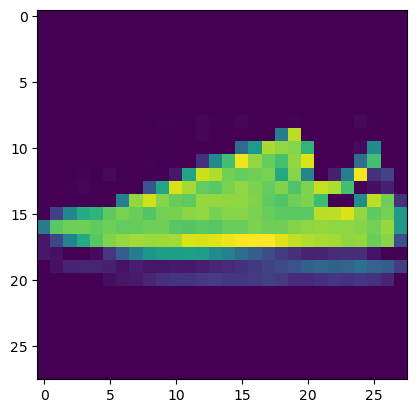

In [10]:
for i in dataset.take(534):
    img = i[0][6]
    plt.imshow(img)
    break

In [11]:
dataset = dataset.shuffle(1000)

# Build DNN

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
])

C:\Users\Hibatullah\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

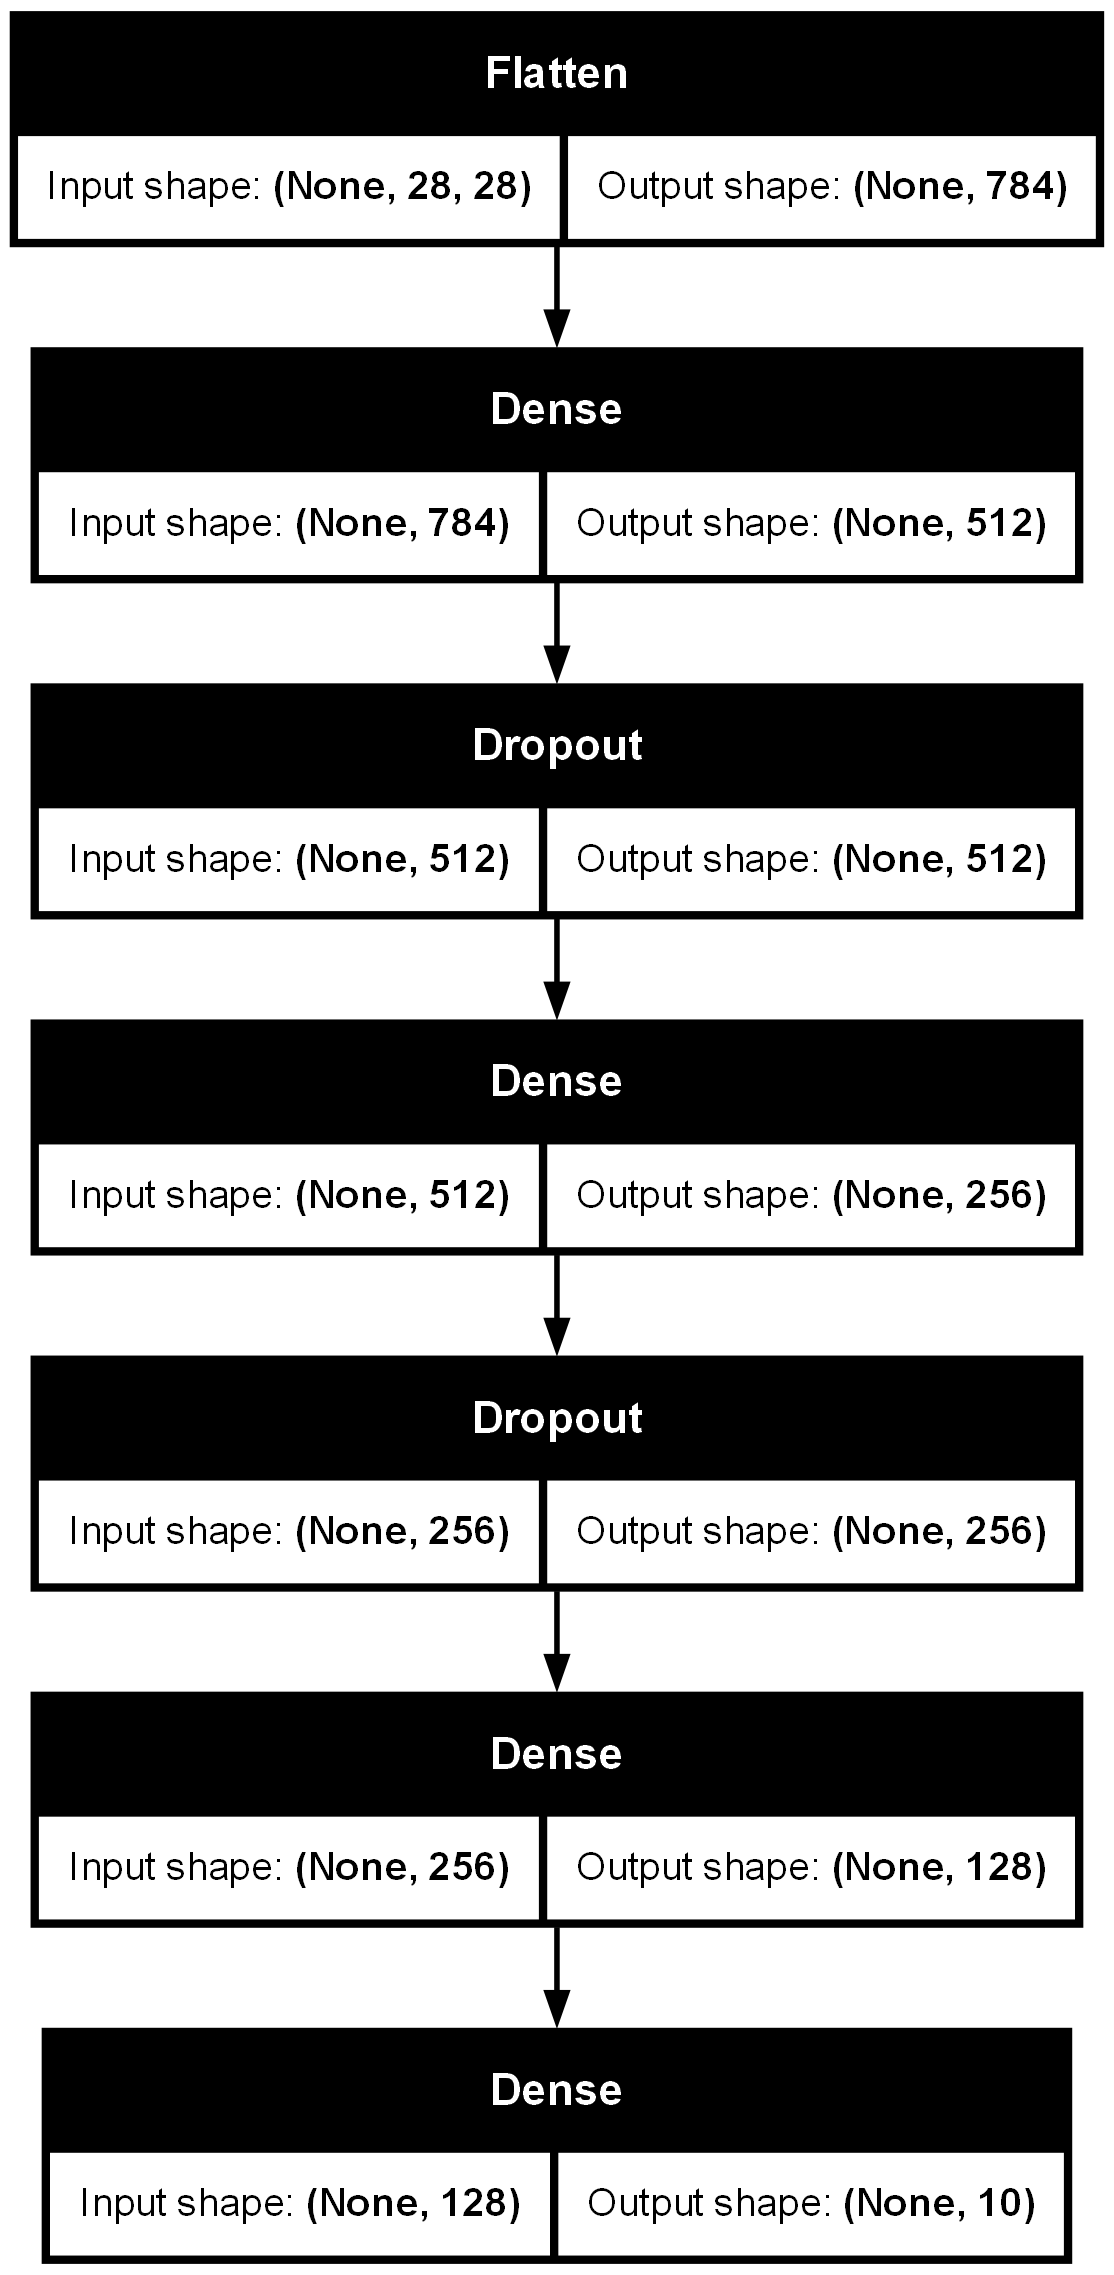

In [14]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Compile the model 

In [15]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

# Train the model 

In [16]:
history = model.fit(dataset, 
                    epochs=10, 
                    steps_per_epoch=10, # To be disabled 
                    validation_data=(X_valid, y_valid))

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.2382 - loss: 2.1319 - val_accuracy: 0.5580 - val_loss: 81.5129
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4454 - loss: 1.5430 - val_accuracy: 0.6588 - val_loss: 56.1419
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5742 - loss: 1.1430 - val_accuracy: 0.7002 - val_loss: 73.9673
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6001 - loss: 0.9993 - val_accuracy: 0.7162 - val_loss: 66.7640
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6694 - loss: 0.9068 - val_accuracy: 0.7348 - val_loss: 77.4553
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6849 - loss: 0.8476 - val_accuracy: 0.7254 - val_loss: 78.7786
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7047 - loss: 0.7931 - val_accuracy: 0.7624 - val_loss: 68.9453
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6827 - loss: 0.8434 - val_accuracy: 0.7

# Plot learning curve 

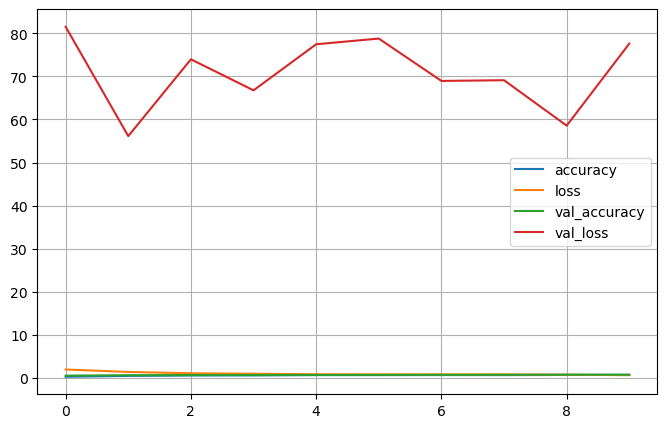

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

# Predicting on the test set

In [18]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.map(process_img)
test_dataset = test_dataset.batch(32)

In [19]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}, Test loss: {test_loss:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7603 - loss: 0.6201
Test accuracy: 0.762, Test loss: 0.629
